<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Log-Transformation" data-toc-modified-id="Log-Transformation-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Log Transformation</a></span></li></ul></div>

In [1]:
# Data manipulation
import numpy as np
import pandas as pd

# Visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Scikit-learn: preprocessing, training, evaluation
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Statsmodels: for detailed regression summaries
import statsmodels.api as sm

from sklearn.preprocessing import StandardScaler

In [2]:
# import statsmodels.api as sm

# # Add constant (intercept term) to the scaled features
# x_scaled_const = sm.add_constant(x_scaled_df)

# # Fit the OLS model
# model_transformed = sm.OLS(y, x_scaled_const).fit()

# # View the summary
# print(model_transformed.summary())


In [3]:
df = pd.read_csv("powerconsumption.csv")

In [4]:
df.head()

,Datetime,Temperature,Humidity,WindSpeed,GeneralDiffuseFlows,DiffuseFlows,PowerConsumption
0,1/1/2017 0:00,6.559,73.8,0.083,0.051,0.119,34055.69620
1,1/1/2017 0:10,6.414,74.5,0.083,0.070,0.085,29814.68354
2,1/1/2017 0:20,6.313,74.5,0.080,0.062,0.100,29128.10127
3,1/1/2017 0:30,6.121,75.0,0.083,0.091,0.096,28228.86076
4,1/1/2017 0:40,5.921,75.7,0.081,0.048,0.085,27335.69620


In [5]:
y = df["PowerConsumption"]
x = df[["Temperature", "Humidity", "WindSpeed", "GeneralDiffuseFlows", "DiffuseFlows", "PowerConsumption"]]

In [6]:
# adding the intercept and trying to fit the model 
x_initial = sm.add_constant(x)

# fitting the model
model_original = sm.OLS(y,x_initial).fit()

In [7]:
print(model_original.summary())

                            OLS Regression Results                            
Dep. Variable:       PowerConsumption   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 2.104e+31
Date:                Mon, 19 May 2025   Prob (F-statistic):               0.00
Time:                        14:56:57   Log-Likelihood:             1.1130e+06
No. Observations:               52416   AIC:                        -2.226e+06
Df Residuals:                   52409   BIC:                        -2.226e+06
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const               -4.366e-11   5

In [8]:
# predicting the values and residuals

y_pred = model_original.predict(x_initial)
residuals = y-y_pred

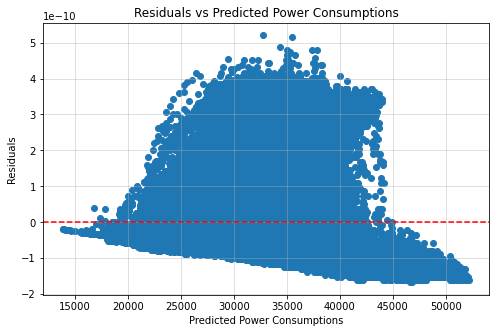

In [9]:
plt.figure(figsize=(8,5))
plt.scatter(y_pred,residuals)
plt.axhline(y=0,color="r",linestyle= "dashed")
plt.xlabel("Predicted Power Consumptions")
plt.ylabel("Residuals")
plt.title("Residuals vs Predicted Power Consumptions")
plt.grid(True, alpha=0.5)
plt.show()

In [10]:
# using the standard scalar 
# applying linear transformation 

scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)
x_scaled_df = pd.DataFrame(x_scaled, columns = x.columns)

In [11]:
x_scaled_const = sm.add_constant(x_scaled_df)
model_transformed = sm.OLS(y,x_scaled_const)

In [12]:
import statsmodels.api as sm

# Add constant (intercept term) to the scaled features
x_scaled_const = sm.add_constant(x_scaled_df)

# Fit the OLS model
model_transformed = sm.OLS(y, x_scaled_const).fit()

# View the summary
print(model_transformed.summary())

                            OLS Regression Results                            
Dep. Variable:       PowerConsumption   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 6.728e+32
Date:                Mon, 19 May 2025   Prob (F-statistic):               0.00
Time:                        14:58:24   Log-Likelihood:             1.2038e+06
No. Observations:               52416   AIC:                        -2.408e+06
Df Residuals:                   52409   BIC:                        -2.407e+06
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                3.234e+04   1

## Log Transformation

In [13]:
# applying log transformation 

df["log_PowerConsumption"] = np.log(df["PowerConsumption"])

In [14]:
y = df["PowerConsumption"]
x = df[["Temperature", "Humidity", "WindSpeed", "GeneralDiffuseFlows", "DiffuseFlows"]]

In [18]:
log_initials = sm.add_constant(x)
model_log = sm.OLS(y,log_initials).fit()

In [19]:
print(model_log.summary())

                            OLS Regression Results                            
Dep. Variable:       PowerConsumption   R-squared:                       0.207
Model:                            OLS   Adj. R-squared:                  0.207
Method:                 Least Squares   F-statistic:                     2741.
Date:                Mon, 19 May 2025   Prob (F-statistic):               0.00
Time:                        15:04:28   Log-Likelihood:            -5.3333e+05
No. Observations:               52416   AIC:                         1.067e+06
Df Residuals:                   52410   BIC:                         1.067e+06
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                2.675e+04    